In [2]:
#librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
"""importar db normal, DoS y Probe"""
df_normal = pd.read_csv('../../datos_SDN/araData/Normal.csv', low_memory=False)
df_dos = pd.read_csv('../../datos_SDN/araData/Dos.csv', low_memory=False)
df_probe = pd.read_csv('../../datos_SDN/araData/Probe.csv', low_memory=False)

# 1. Limpieza de datos

## 1.1 Eliminar datos innecesarios

### Columnas

In [3]:
"""definir caractericticas innecesarias"""
caracteristicas_in=['SrcId','Rank','Trans','sDSb','dDSb','sIpId','dIpId','SrcGap','DstGap','dsPkts','ddPkts','dsBytes',
'ddBytes','pdsPkt','pddPkt','pdsByte','pddByte','(null)','SrcWin','DstWin','JDelay','LDelay','Bins','Bin', 'SrcTCPBase','DstTCPBase'
,'Inode','sPktSz','dPktSz']

In [4]:
""" eliminar de atributos """
df_normal.drop(columns=caracteristicas_in, axis=1, inplace=True)
df_dos.drop(columns=caracteristicas_in, axis=1, inplace=True)
df_probe.drop(columns=caracteristicas_in, axis=1, inplace=True)

In [5]:
print(df_normal.shape,'\n',df_dos.shape,'\n',df_probe.shape)

(111719, 93) 
 (35030, 93) 
 (49452, 93)


In [24]:
"""guardar estados de datos"""
df_normal.to_csv('../../araData/normal_sinfaltantes.csv',index=False)
df_dos.to_csv('../../araData/dos_sinfaltantes.csv',index=False)
df_probe.to_csv('../../araData/probe_sinfaltantes.csv',index=False)

### Registros innecesarios
Protocolos, tiempos de duracion, IPs.
#### Normal

In [7]:
"""verificiar protocolos para trafico normal"""
df_normal.Proto.unique()

array(['man', 'tcp', 'udp', 'ipv6-icmp', 'igmp', 'lldp', 'unknown', 'arp',
       'icmp', 'rtcp'], dtype=object)

In [6]:
"""mostrar protocolos no L4"""
df_normal[(df_normal.Proto=='man') | (df_normal.Proto=='ipv6-icmp') | (df_normal.Proto=='igmp') 
| (df_normal.Proto=='lldp') | (df_normal.Proto=='unknown') | (df_normal.Proto=='arp') | (df_normal.Proto=='icmp') 
| (df_normal.Proto=='rtcp') ]

,StartTime,LastTime,SrcStartTime,DstStartTime,SrcLastTime,DstLastTime,Seq,Flgs,RunTime,Dur,...,AckDat,TcpOpt,Offset,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Label
0,19:55:39.616135,19:55:39.614701,19:55:39.614701,19:55:39.614701,19:55:39.616135,19:55:39.616135,0,,NaN,0.001434,...,0.0,NaN,0,0.0,0.0,NaN,NaN,NaN,NaN,Normal
1244,19:55:40.620953,19:55:39.614701,19:55:39.614701,19:55:39.614701,19:55:40.620953,19:55:40.620953,0,,NaN,1.006252,...,0.0,NaN,247452,0.0,0.0,NaN,NaN,NaN,NaN,Normal
1245,19:55:45.648495,19:55:45.646908,19:55:45.646908,19:55:45.646908,19:55:45.648495,19:55:45.648495,0,,NaN,0.001587,...,0.0,NaN,0,0.0,0.0,NaN,NaN,NaN,NaN,Normal
1309,09:31:10.141621,09:31:10.141621,09:31:10.141621,19:00:00.000000,09:31:10.141621,19:00:00.000000,16,e,0.000000,0.000000,...,0.0,NaN,19416,70.0,0.0,70.0,NaN,70.0,NaN,Normal
1335,09:33:51.531326,09:33:51.631684,09:33:51.531326,19:00:00.000000,09:33:51.631684,19:00:00.000000,18,e A,0.100358,0.100358,...,0.0,NaN,28028,90.0,0.0,90.0,NaN,90.0,NaN,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111646,14:20:09.429624,14:20:09.429624,14:20:09.429624,19:00:00.000000,14:20:09.429624,19:00:00.000000,9,e A,0.000000,0.000000,...,0.0,NaN,8304,60.0,0.0,60.0,NaN,60.0,NaN,Normal
111647,14:20:09.430667,14:20:09.430667,14:20:09.430667,19:00:00.000000,14:20:09.430667,19:00:00.000000,10,e A,0.000000,0.000000,...,0.0,NaN,8420,60.0,0.0,60.0,NaN,60.0,NaN,Normal
111648,14:20:09.431118,14:20:09.431118,14:20:09.431118,19:00:00.000000,14:20:09.431118,19:00:00.000000,11,e A,0.000000,0.000000,...,0.0,NaN,8536,60.0,0.0,60.0,NaN,60.0,NaN,Normal
111652,14:20:09.648516,14:20:09.648516,14:20:09.648516,19:00:00.000000,14:20:09.648516,19:00:00.000000,15,e A,0.000000,0.000000,...,0.0,NaN,9108,60.0,0.0,60.0,NaN,60.0,NaN,Normal


In [8]:
"""eliminar filas anteriores"""
df_normal = df_normal[(df_normal.Proto=='tcp')| (df_normal.Proto=='udp')]

In [9]:
"""verificar protocolos de capa 4"""
df_normal.Proto.value_counts()

udp    58727
tcp    41971
Name: Proto, dtype: int64

### Probe

In [21]:
"""verificiar protocolos"""
df_probe.Proto.unique()

array(['man', 'tcp', 'arp', 'udp', 'icmp', 'lldp', 'ipv6-icmp', 'gmtp',
       'cpnx', 'ipcomp', 'unas', 'ipcv', 'sat-mon', 'pup', 'bbn-rcc',
       'sep', 'a/n', 'ddp', 'ipip', 'rsvp', 'uti', 'ptp', 'ipv6', 'st2',
       'idpr-cmtp', 'mobile', 'isis', 'sm', 'vrrp', 'xns-idp', 'scps',
       'tp++', 'l2tp', 'cbt', 'crudp', 'eigrp', 'snp', 'sps', 'prm',
       'iso-tp4', 'idrp', 'srp', 'chaos', 'ddx', 'igp', 'ipx-n-ip',
       'ipv6-opts', 'gre', 'argus', 'fire', 'xnet', 'wb-expak', 'any',
       'leaf-2', 'pvp', 'sun-nd', 'tlsp', 'aes-sp3-d', 'aris', 'iatp',
       'dgp', 'sprite-rpc', 'visa', 'emcon', 'sccopmce', 'wb-mon', 'xtp',
       'ttp', 'bna', 'ib', 'netblt', 'nvp', 'br-sat-mon', 'mtp', 'crtp',
       'hmp', 'ipv6-frag', 'compaq-peer', 'swipe', 'kryptolan', 'rdp',
       'larp', 'fc', 'smp', 'skip', 'ip', 'rvd', 'mhrp', 'irtp', 'idpr',
       'trunk-2', 'ah', 'cftp', 'encap', 'iso-ip', 'i-nlsp', '3pc', 'stp',
       'igmp', 'ipv6-no', 'narp', 'sdrp', 'sat-expak', 'qnx', 'ggp',


In [10]:
"""se elimina todos los protocolos anteriores desconocidos"""
df_probe = df_probe[(df_probe.Proto=='tcp')| (df_probe.Proto=='udp')| (df_probe.Proto=='icmp')| (df_probe.Proto=='unas')]

In [11]:
df_probe.Proto.value_counts()

tcp     36828
udp      5889
icmp     5243
unas      480
Name: Proto, dtype: int64

### DoS

In [12]:
"""verificiar protocolos"""
df_dos.Proto.unique()

array(['man', 'tcp', 'udp', 'ipv6-icmp', 'igmp', 'icmp', 'lldp'],
      dtype=object)

In [13]:
"""eliminar protocolos"""
df_dos = df_dos[(df_dos.Proto=='tcp')| (df_dos.Proto=='udp')| (df_dos.Proto=='icmp')]

In [14]:
df_dos.Proto.value_counts()

tcp     34873
udp       111
icmp        2
Name: Proto, dtype: int64

### Normal, Probe y DoS

In [22]:
df_normal[(df_normal.RunTime==0.0) | (df_normal.Dur==0.0)]

,StartTime,LastTime,SrcStartTime,DstStartTime,SrcLastTime,DstLastTime,Seq,Flgs,RunTime,Dur,...,AckDat,TcpOpt,Offset,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Label
1249,09:26:00.989740,09:26:00.989740,09:26:00.989740,19:00:00.000000,09:26:00.989740,19:00:00.000000,4,e,0.0,0.0,...,0.0,NaN,1164,60.0,0.0,60.0,NaN,60.0,NaN,Normal
1250,09:26:00.989753,09:26:00.989753,09:26:00.989753,19:00:00.000000,09:26:00.989753,19:00:00.000000,5,e,0.0,0.0,...,0.0,NaN,1276,60.0,0.0,60.0,NaN,60.0,NaN,Normal
1299,09:31:00.991274,09:31:00.991274,09:31:00.991274,19:00:00.000000,09:31:00.991274,19:00:00.000000,9,e,0.0,0.0,...,0.0,NaN,17388,60.0,0.0,60.0,NaN,60.0,NaN,Normal
1300,09:31:00.991293,09:31:00.991293,09:31:00.991293,19:00:00.000000,09:31:00.991293,19:00:00.000000,10,e,0.0,0.0,...,0.0,NaN,17500,60.0,0.0,60.0,NaN,60.0,NaN,Normal
1342,09:33:51.567054,09:33:51.567054,09:33:51.567054,19:00:00.000000,09:33:51.567054,19:00:00.000000,25,e,0.0,0.0,...,0.0,NaN,29000,94.0,0.0,94.0,NaN,94.0,NaN,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111687,14:21:44.882599,14:21:44.882599,14:21:44.882599,19:00:00.000000,14:21:44.882599,19:00:00.000000,32,e,0.0,0.0,...,0.0,NaN,17100,64.0,0.0,64.0,NaN,64.0,NaN,Normal
111701,14:22:47.141405,14:22:47.141405,14:22:47.141405,19:00:00.000000,14:22:47.141405,19:00:00.000000,37,e,0.0,0.0,...,0.0,NaN,20940,84.0,0.0,84.0,NaN,84.0,NaN,Normal
111702,14:22:47.141418,14:22:47.141418,14:22:47.141418,19:00:00.000000,14:22:47.141418,19:00:00.000000,38,e,0.0,0.0,...,0.0,NaN,21076,84.0,0.0,84.0,NaN,84.0,NaN,Normal
111703,14:22:47.141655,14:22:47.141655,14:22:47.141655,19:00:00.000000,14:22:47.141655,19:00:00.000000,39,e,0.0,0.0,...,0.0,NaN,21212,64.0,0.0,64.0,NaN,64.0,NaN,Normal


In [24]:
df_probe[(df_probe.RunTime==0.0) | (df_probe.Dur==0.0)]

,StartTime,LastTime,SrcStartTime,DstStartTime,SrcLastTime,DstLastTime,Seq,Flgs,RunTime,Dur,...,AckDat,TcpOpt,Offset,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Label
45,09:04:30.779428,09:04:30.779428,09:04:30.779428,19:00:00.000000,09:04:30.779428,19:00:00.000000,38,e,0.0,0.0,...,0.0,NaN,10996,114.0,0.0,114.0,NaN,114.0,NaN,Probe
245,09:30:28.200573,09:30:28.200573,09:30:28.200573,19:00:00.000000,09:30:28.200573,19:00:00.000000,191,e,0.0,0.0,...,0.0,NaN,57200,114.0,0.0,114.0,NaN,114.0,NaN,Probe
1034,08:59:54.798939,08:59:54.798939,08:59:54.798939,19:00:00.000000,08:59:54.798939,19:00:00.000000,26,e,0.0,0.0,...,0.0,NaN,109376,203.0,0.0,203.0,NaN,203.0,NaN,Probe
1035,08:59:54.799019,08:59:54.799019,08:59:54.799019,19:00:00.000000,08:59:54.799019,19:00:00.000000,27,e,0.0,0.0,...,0.0,NaN,109512,183.0,0.0,183.0,NaN,183.0,NaN,Probe
1036,08:59:55.445776,08:59:55.445776,08:59:55.445776,19:00:00.000000,08:59:55.445776,19:00:00.000000,28,e,0.0,0.0,...,0.0,NaN,109624,203.0,0.0,203.0,NaN,203.0,NaN,Probe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49446,08:59:15.697198,08:59:15.697198,08:59:15.697198,19:00:00.000000,08:59:15.697198,19:00:00.000000,48203,e,0.0,0.0,...,0.0,NaN,10430320,87.0,0.0,87.0,NaN,87.0,NaN,Probe
49447,08:59:15.697668,08:59:15.697668,08:59:15.697668,19:00:00.000000,08:59:15.697668,19:00:00.000000,48204,e,0.0,0.0,...,0.0,NaN,10430432,87.0,0.0,87.0,NaN,87.0,NaN,Probe
49448,08:59:15.697728,08:59:15.697728,08:59:15.697728,19:00:00.000000,08:59:15.697728,19:00:00.000000,48205,e,0.0,0.0,...,0.0,NaN,10430544,87.0,0.0,87.0,NaN,87.0,NaN,Probe
49449,08:59:15.697779,08:59:15.697779,08:59:15.697779,19:00:00.000000,08:59:15.697779,19:00:00.000000,48206,e,0.0,0.0,...,0.0,NaN,10430656,87.0,0.0,87.0,NaN,87.0,NaN,Probe


In [25]:
df_dos[(df_dos.RunTime==0.0) | (df_dos.Dur==0.0)]

,StartTime,LastTime,SrcStartTime,DstStartTime,SrcLastTime,DstLastTime,Seq,Flgs,RunTime,Dur,...,AckDat,TcpOpt,Offset,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Label
337,13:13:00.814769,13:13:00.814769,13:13:00.814769,19:00:00.000000,13:13:00.814769,19:00:00.000000,2,e,0.0,0.0,...,0.003392,Mws T,51816,66.0,0.0,66.0,NaN,66.0,NaN,Dos
338,13:13:00.814870,13:13:00.814870,13:13:00.814870,19:00:00.000000,13:13:00.814870,19:00:00.000000,3,e,0.0,0.0,...,0.002805,Mws T,52044,66.0,0.0,66.0,NaN,66.0,NaN,Dos
339,13:13:00.814890,13:13:00.814890,13:13:00.814890,19:00:00.000000,13:13:00.814890,19:00:00.000000,4,e,0.0,0.0,...,0.007383,Mws T,52272,66.0,0.0,66.0,NaN,66.0,NaN,Dos
340,13:13:00.814903,13:13:00.814903,13:13:00.814903,19:00:00.000000,13:13:00.814903,19:00:00.000000,5,e,0.0,0.0,...,0.002580,Mws T,52500,66.0,0.0,66.0,NaN,66.0,NaN,Dos
341,13:13:00.814916,13:13:00.814916,13:13:00.814916,19:00:00.000000,13:13:00.814916,19:00:00.000000,6,e,0.0,0.0,...,0.002220,Mws T,52728,66.0,0.0,66.0,NaN,66.0,NaN,Dos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34872,17:26:27.374600,17:26:27.374600,17:26:27.374600,19:00:00.000000,17:26:27.374600,19:00:00.000000,34,e s,0.0,0.0,...,0.000000,Mws T,44864,74.0,0.0,74.0,NaN,74.0,NaN,Dos
34877,17:26:29.422350,17:26:29.422350,17:26:29.422350,19:00:00.000000,17:26:29.422350,19:00:00.000000,43,e s,0.0,0.0,...,0.000000,Mws T,46344,74.0,0.0,74.0,NaN,74.0,NaN,Dos
34878,17:26:29.422773,17:26:29.422773,17:26:29.422773,19:00:00.000000,17:26:29.422773,19:00:00.000000,42,e s,0.0,0.0,...,0.000000,Mws T,46592,74.0,0.0,74.0,NaN,74.0,NaN,Dos
34879,17:26:29.422792,17:26:29.422792,17:26:29.422792,19:00:00.000000,17:26:29.422792,19:00:00.000000,41,e s,0.0,0.0,...,0.000000,Mws T,46840,74.0,0.0,74.0,NaN,74.0,NaN,Dos


In [26]:
"""funcion para eliminar datos innecesarios"""
def eliminar_filasvaloresDesconocidos(_daframe:pd.DataFrame, _dfilasConsulta:pd.DataFrame):
    filas_eliminar=[]
    for index, fila in _dfilasConsulta.iterrows():
        filas_eliminar.append(index)
        """eliminar registros de filas almacenados """
    _daframe.drop(filas_eliminar, axis=0, inplace=True)

In [27]:
eliminar_filasvaloresDesconocidos(df_normal,df_normal[(df_normal.RunTime==0.0) | (df_normal.Dur==0.0)])
eliminar_filasvaloresDesconocidos(df_probe,df_probe[(df_probe.RunTime==0.0) | (df_probe.Dur==0.0)])
eliminar_filasvaloresDesconocidos(df_dos,df_dos[(df_dos.RunTime==0.0) | (df_dos.Dur==0.0)])

In [32]:
print(df_normal.shape,'\n',df_dos.shape,'\n',df_probe.shape)

(94600, 93) 
 (34288, 93) 
 (42079, 93)


### Normal, Probe y DoS

In [92]:
direccionesIP= df_normal.DstAddr.unique()

In [94]:
df_dos.SrcAddr.value_counts()

200.175.2.130                34185
192.168.8.129                   84
192.168.8.128                    9
192.168.8.1                      7
192.168.20.134                   2
fe80::a9c8:a7bc:187d:eb55        1
Name: SrcAddr, dtype: int64

In [93]:
df_normal[(df_normal.SrcAddr=="fe80::a9c8:a7bc:187d:eb55") | (df_normal.SrcAddr=="fe80::381f:c0ff:fec6:500") | (df_normal.SrcAddr=="fe80::20c:29ff:fe92:12ba")]

,StartTime,LastTime,SrcStartTime,DstStartTime,SrcLastTime,DstLastTime,Seq,Flgs,RunTime,Dur,...,AckDat,TcpOpt,Offset,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Label
1303,09:31:01.730686,09:31:02.734434,09:31:01.730686,19:00:00.000000,09:31:02.734434,19:00:00.000000,13,e,1.003748,1.003748,...,0.0,NaN,17900,90.0,0.0,90.0,NaN,90.0,NaN,Normal
1304,09:31:01.732744,09:31:02.144417,09:31:01.732744,19:00:00.000000,09:31:02.144417,19:00:00.000000,14,e,0.411673,0.411673,...,0.0,NaN,18068,84.0,0.0,84.0,NaN,84.0,NaN,Normal
1341,09:33:51.559059,09:33:51.567868,09:33:51.559059,19:00:00.000000,09:33:51.567868,19:00:00.000000,24,e,0.008809,0.008809,...,0.0,NaN,28832,119.0,0.0,138.0,NaN,100.0,NaN,Normal
9459,09:33:30.610284,09:33:31.107797,09:33:30.610284,19:00:00.000000,09:33:31.107797,19:00:00.000000,5273,e,0.497513,0.497513,...,0.0,NaN,1721552,143.5,0.0,192.0,NaN,95.0,NaN,Normal
10416,09:01:35.904791,09:01:35.913364,09:01:35.904791,19:00:00.000000,09:01:35.913364,19:00:00.000000,19,e,0.008573,0.008573,...,0.0,NaN,36948,119.0,0.0,138.0,NaN,100.0,NaN,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107073,10:08:33.484741,10:08:33.896014,10:08:33.484741,19:00:00.000000,10:08:33.896014,19:00:00.000000,79,e,0.411273,0.411273,...,0.0,NaN,71908,94.0,0.0,94.0,NaN,94.0,NaN,Normal
111650,14:20:09.436469,14:20:09.439273,14:20:09.436469,19:00:00.000000,14:20:09.439273,19:00:00.000000,13,e,0.002804,0.002804,...,0.0,NaN,8796,119.0,0.0,138.0,NaN,100.0,NaN,Normal
111669,14:21:21.956843,14:21:28.212660,14:21:21.956843,19:00:00.000000,14:21:28.212660,19:00:00.000000,20,e,6.255817,6.255817,...,0.0,NaN,13972,90.0,0.0,90.0,NaN,90.0,NaN,Normal
111683,14:21:44.468214,14:21:45.469968,14:21:44.468214,19:00:00.000000,14:21:45.469968,19:00:00.000000,20,e,1.001754,1.001754,...,0.0,NaN,16548,90.0,0.0,90.0,NaN,90.0,NaN,Normal


In [95]:
df_dos[(df_dos.SrcAddr=="fe80::a9c8:a7bc:187d:eb55")]

,StartTime,LastTime,SrcStartTime,DstStartTime,SrcLastTime,DstLastTime,Seq,Flgs,RunTime,Dur,...,AckDat,TcpOpt,Offset,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Label
24268,13:03:55.007616,13:03:55.014944,13:03:55.007616,19:00:00.000000,13:03:55.014944,19:00:00.000000,12,e,0.007328,0.007328,...,0.0,NaN,3336,119.0,0.0,138.0,NaN,100.0,NaN,Dos


In [100]:
eliminar_filasvaloresDesconocidos(df_normal,df_normal[(df_normal.SrcAddr=="fe80::a9c8:a7bc:187d:eb55")| 
(df_normal.SrcAddr=="fe80::381f:c0ff:fec6:500") | (df_normal.SrcAddr=="fe80::20c:29ff:fe92:12ba")])
eliminar_filasvaloresDesconocidos(df_dos,df_dos[(df_dos.SrcAddr=="fe80::a9c8:a7bc:187d:eb55")])

In [103]:
"""cantidad de registros"""
print(df_normal.shape,'\n',df_dos.shape,'\n',df_probe.shape)

(94285, 93) 
 (34287, 93) 
 (42079, 93)


## 1.2 Eliminar valores duplicados

In [104]:
print(df_normal.duplicated().sum(),df_probe.duplicated().sum(),df_dos.duplicated().sum())

0 0 0


## 1.3 Revisar variables Redundantes

In [44]:
df_normal.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94600 entries, 1 to 111717
Data columns (total 93 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   StartTime     94600 non-null  object 
 1   LastTime      94600 non-null  object 
 2   SrcStartTime  94600 non-null  object 
 3   DstStartTime  94600 non-null  object 
 4   SrcLastTime   94600 non-null  object 
 5   DstLastTime   94600 non-null  object 
 6   Seq           94600 non-null  int64  
 7   Flgs          94600 non-null  object 
 8   RunTime       94600 non-null  float64
 9   Dur           94600 non-null  float64
 10  SrcDur        94600 non-null  float64
 11  DstDur        94600 non-null  float64
 12  Mean          94600 non-null  float64
 13  StdDev        94600 non-null  float64
 14  Sum           94600 non-null  float64
 15  Min           94600 non-null  float64
 16  Max           94600 non-null  float64
 17  Dir           94600 non-null  object 
 18  SrcAddr       94600 non-n

In [67]:
"""caracteristicas de tiempo"""
df_normal.iloc[:,[8,9,12,14,15,16]]

,RunTime,Dur,Mean,Sum,Min,Max
1,11.450987,11.450987,11.450987,11.450987,11.450987,11.450987
2,12.774145,12.774145,12.774145,12.774145,12.774145,12.774145
3,11.265332,11.265332,11.265332,11.265332,11.265332,11.265332
4,11.261298,11.261298,11.261298,11.261298,11.261298,11.261298
5,11.261163,11.261163,11.261163,11.261163,11.261163,11.261163
...,...,...,...,...,...,...
111713,19.554995,19.554995,19.554995,19.554995,19.554995,19.554995
111714,19.867643,19.867643,19.867643,19.867643,19.867643,19.867643
111715,18.200975,18.200975,18.200975,18.200975,18.200975,18.200975
111716,16.801098,16.801098,16.801098,16.801098,16.801098,16.801098


In [68]:
"""comprobar si todas las filas tienen el mismo valor del primero"""
for fila in df_normal.iloc[:,[8,9,12,14,15,16]].values:
    for col in range(6):
        if fila[0] != fila[col]:
            print(True)

## 1.4 Eliminacion por seleccion de caracteristicas

In [2]:
caracteristicas_eldir = ['StartTime', 'LastTime','SrcStartTime','DstStartTime','SrcLastTime',
'DstLastTime', 'Seq','Flgs','SrcAddr','DstAddr','Sport','sTos','dTos','sTtl','dTtl','PCRatio'
,'TcpRtt', 'SynAck','AckDat','TcpOpt','Offset']

In [5]:
""" eliminar atributos por seleccion """
df_normal.drop(columns=caracteristicas_eldir, axis=1, inplace=True)
df_dos.drop(columns=caracteristicas_eldir, axis=1, inplace=True)
df_probe.drop(columns=caracteristicas_eldir, axis=1, inplace=True)

In [6]:
"""cantidad de registros"""
print(df_normal.shape,'\n',df_dos.shape,'\n',df_probe.shape)

(94285, 72) 
 (34287, 72) 
 (42079, 72)


## 1.5 Valores faltantes, atipicos

In [28]:
df_normal.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94285 entries, 0 to 94284
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RunTime     94285 non-null  float64
 1   Dur         94285 non-null  float64
 2   SrcDur      94285 non-null  float64
 3   DstDur      94285 non-null  float64
 4   Mean        94285 non-null  float64
 5   StdDev      94285 non-null  float64
 6   Sum         94285 non-null  float64
 7   Min         94285 non-null  float64
 8   Max         94285 non-null  float64
 9   Dir         94285 non-null  object 
 10  Proto       94285 non-null  object 
 11  Dport       94285 non-null  object 
 12  Cause       94285 non-null  object 
 13  TotPkts     94285 non-null  int64  
 14  SrcPkts     94285 non-null  int64  
 15  DstPkts     94285 non-null  int64  
 16  TotBytes    94285 non-null  int64  
 17  SrcBytes    94285 non-null  int64  
 18  DstBytes    94285 non-null  int64  
 19  TotAppByte  94285 non-nul

In [21]:
faltantes=['SIntPkt','DIntPkt','SIntPktAct','DIntPktAct','SIntPktIdl','DIntPktIdl',
'SIntPktMax','SIntPktMin','DIntPktMax','DIntPktMin','SIPActMax'
,'SIPActMin','DIPActMax','DIPActMin','SIPIdlMax','SIPIdlMin','DIPIdlMax','DIPIdlMin'
,'SrcJitter','DstJitter','SrcJitAct','DstJitAct','SrcJitIdl','DstJitIdl']

In [23]:
""" eliminar atributos que contienen datos faltantes """
df_normal.drop(columns=faltantes, axis=1, inplace=True)
df_dos.drop(columns=faltantes, axis=1, inplace=True)
df_probe.drop(columns=faltantes, axis=1, inplace=True)

<AxesSubplot: >

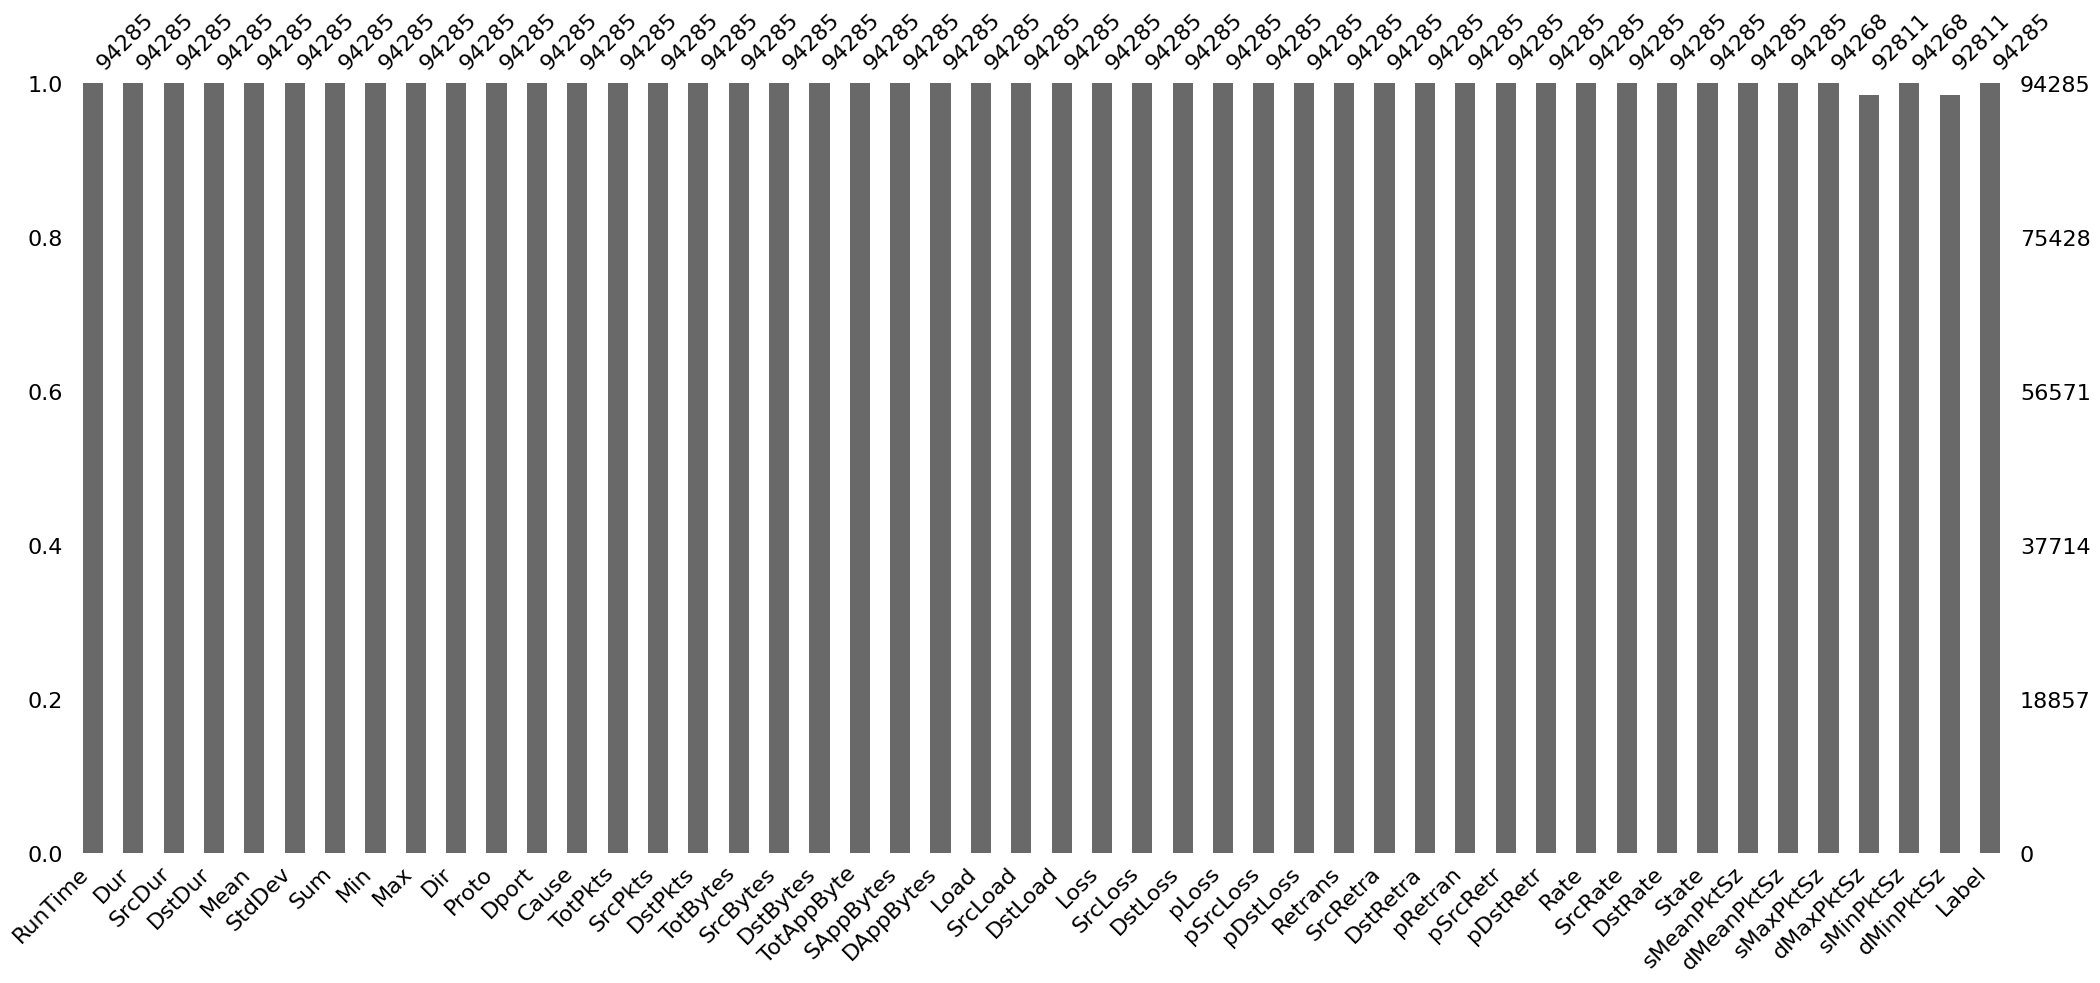

In [25]:
msno.bar(df_normal)

<AxesSubplot: >

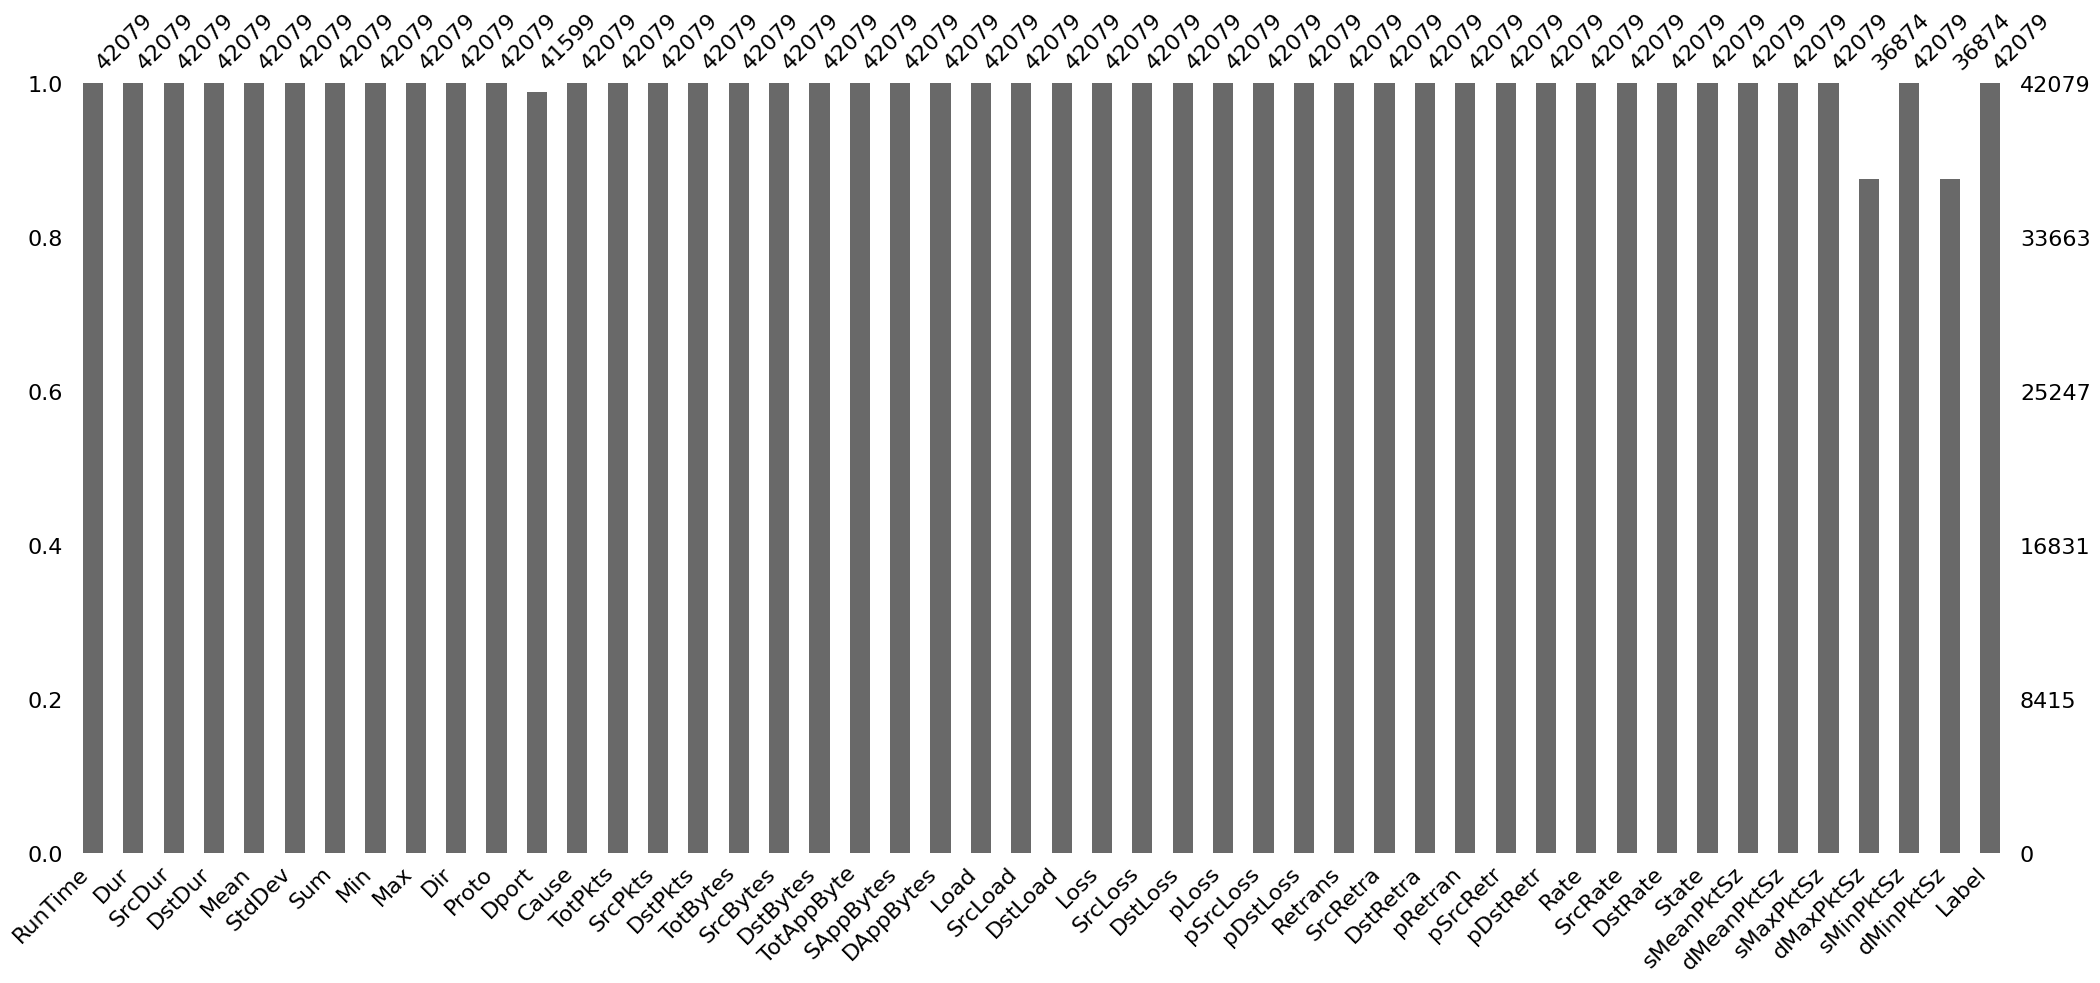

In [26]:
msno.bar(df_probe)

<AxesSubplot: >

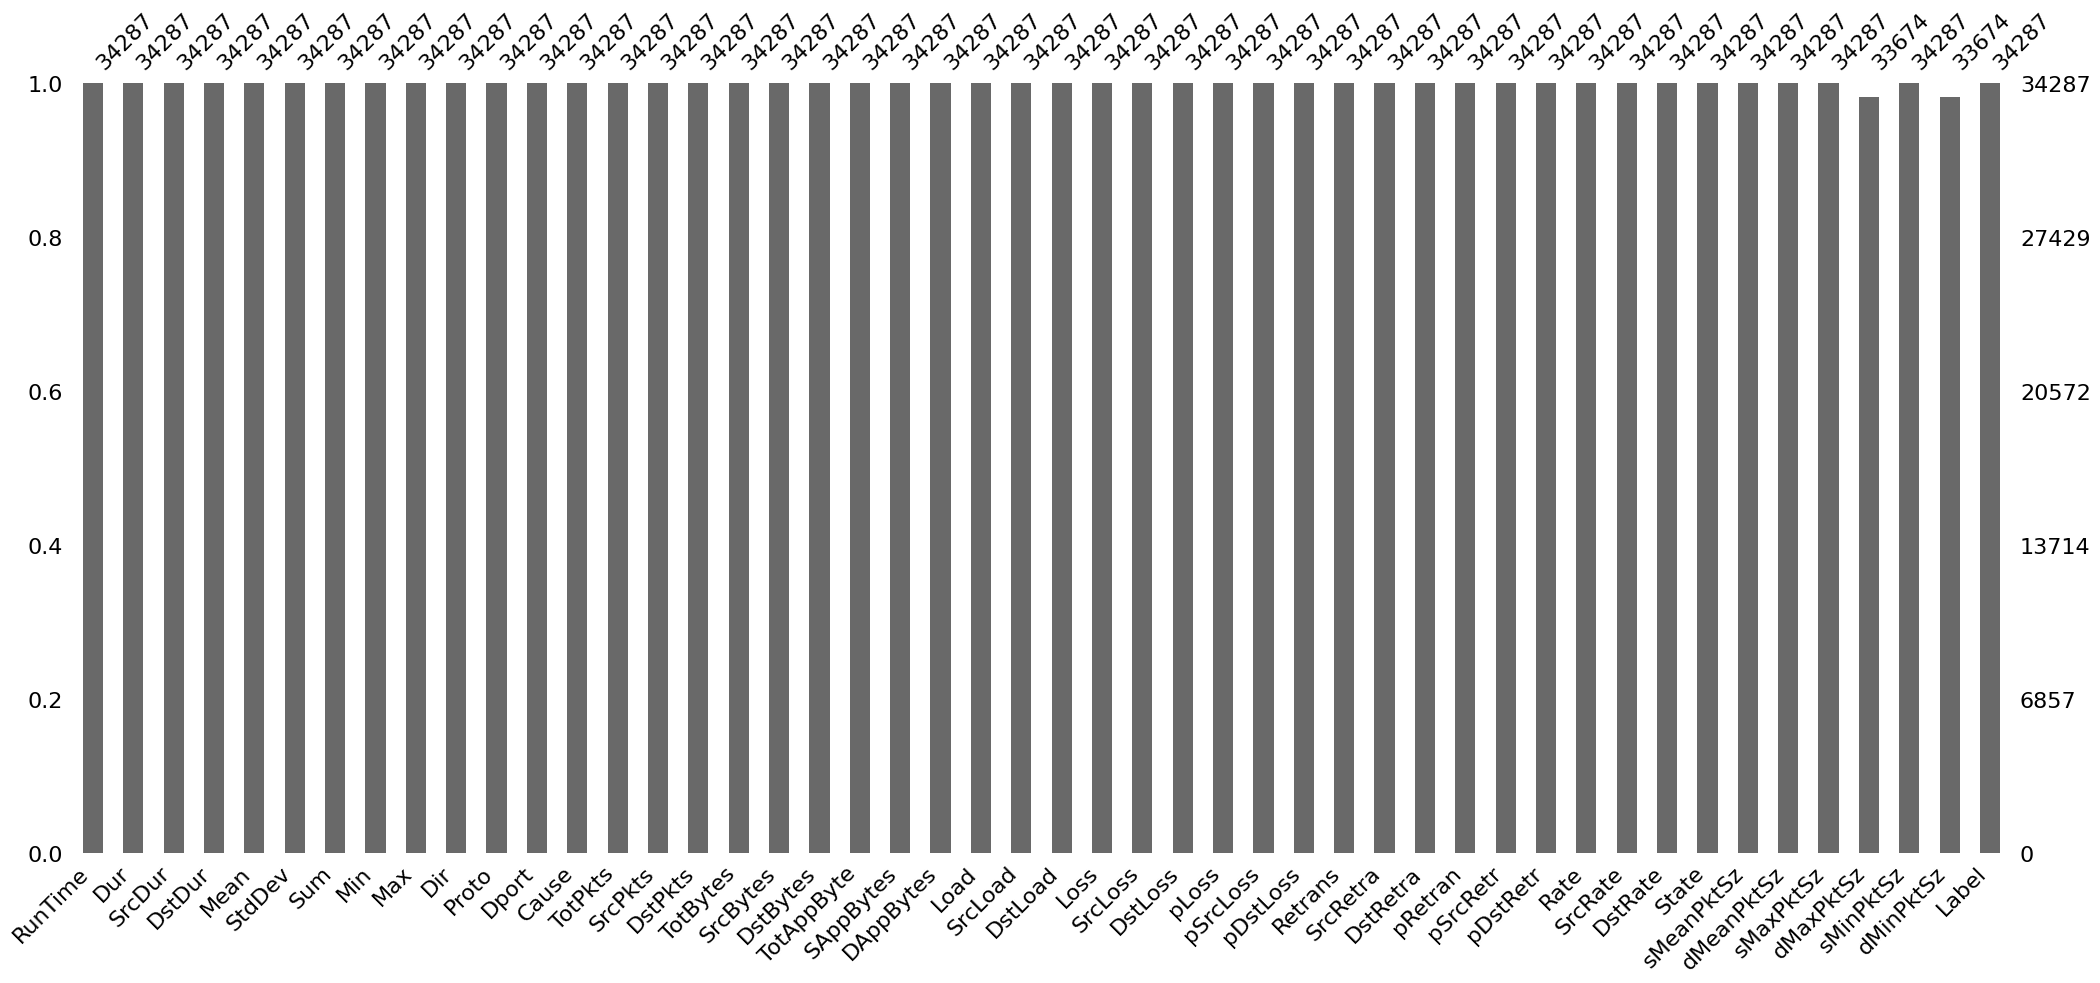

In [27]:
msno.bar(df_dos)

### Valores atipicos

In [8]:
df_normal.isna().sum()

RunTime          0
Dur              0
SrcDur           0
DstDur           0
Mean             0
StdDev           0
Sum              0
Min              0
Max              0
Dir              0
Proto            0
Dport            0
Cause            0
TotPkts          0
SrcPkts          0
DstPkts          0
TotBytes         0
SrcBytes         0
DstBytes         0
TotAppByte       0
SAppBytes        0
DAppBytes        0
Load             0
SrcLoad          0
DstLoad          0
Loss             0
SrcLoss          0
DstLoss          0
pLoss            0
pSrcLoss         0
pDstLoss         0
Retrans          0
SrcRetra         0
DstRetra         0
pRetran          0
pSrcRetr         0
pDstRetr         0
Rate             0
SrcRate          0
DstRate          0
State            0
sMeanPktSz       0
dMeanPktSz       0
sMaxPktSz       17
dMaxPktSz     1474
sMinPktSz       17
dMinPktSz     1474
Label            0
dtype: int64

In [7]:
df_normal[(df_normal.sMaxPktSz.isna())]

,RunTime,Dur,SrcDur,DstDur,Mean,StdDev,Sum,Min,Max,Dir,...,SrcRate,DstRate,State,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Label
3859,0.262080,0.262080,0.0,0.262080,0.262080,0.0,0.262080,0.262080,0.262080,->,...,0.0,808.913269,CLO,0.0,1304.164307,NaN,1514.0,NaN,54.0,Normal
3865,1.471940,1.471940,0.0,1.471940,1.471940,0.0,1.471940,1.471940,1.471940,->,...,0.0,10.190633,FIN,0.0,463.687500,NaN,1514.0,NaN,54.0,Normal
3866,1.431270,1.431270,0.0,1.431270,1.431270,0.0,1.431270,1.431270,1.431270,->,...,0.0,2.794721,FIN,0.0,100.599998,NaN,283.0,NaN,54.0,Normal
3867,1.448238,1.448238,0.0,1.448238,1.448238,0.0,1.448238,1.448238,1.448238,->,...,0.0,5.523954,FIN,0.0,124.777779,NaN,265.0,NaN,54.0,Normal
4032,0.211423,0.211423,0.0,0.211423,0.211423,0.0,0.211423,0.211423,0.211423,->,...,0.0,9.459709,FIN,0.0,64.333336,NaN,85.0,NaN,54.0,Normal
65394,0.822284,0.822284,0.0,0.822284,0.822284,0.0,0.822284,0.822284,0.822284,->,...,0.0,13.377374,FIN,0.0,446.000000,NaN,1514.0,NaN,54.0,Normal
65450,17.122398,17.122398,0.0,17.122398,17.122398,0.0,17.122398,17.122398,17.122398,->,...,0.0,2.569733,CLO,0.0,861.533325,NaN,1514.0,NaN,54.0,Normal
65452,8.895044,8.895044,0.0,8.895044,8.895044,0.0,8.895044,8.895044,8.895044,->,...,0.0,5.058997,CLO,0.0,841.695679,NaN,1514.0,NaN,54.0,Normal
65453,0.299827,0.299827,0.0,0.299827,0.299827,0.0,0.299827,0.299827,0.299827,->,...,0.0,493.617981,CLO,0.0,1244.899292,NaN,1514.0,NaN,54.0,Normal
65484,10.836836,10.836836,0.0,10.836836,10.836836,0.0,10.836836,10.836836,10.836836,->,...,0.0,1.384168,FIN,0.0,462.000000,NaN,1514.0,NaN,54.0,Normal


In [10]:
df_normal[(df_normal.dMaxPktSz.isna())]

,RunTime,Dur,SrcDur,DstDur,Mean,StdDev,Sum,Min,Max,Dir,...,SrcRate,DstRate,State,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Label
1255,3.003740,3.003740,3.003740,0.0,3.003740,0.0,3.003740,3.003740,3.003740,->,...,0.998755,0.0,INT,215.0,0.0,215.0,NaN,215.0,NaN,Normal
1274,3.003575,3.003575,3.003575,0.0,3.003575,0.0,3.003575,3.003575,3.003575,->,...,0.998810,0.0,INT,215.0,0.0,215.0,NaN,215.0,NaN,Normal
1293,3.004554,3.004554,3.004554,0.0,3.004554,0.0,3.004554,3.004554,3.004554,->,...,0.998484,0.0,INT,215.0,0.0,215.0,NaN,215.0,NaN,Normal
1294,1.500592,1.500592,1.500592,0.0,1.500592,0.0,1.500592,1.500592,1.500592,->,...,1.332807,0.0,INT,92.0,0.0,92.0,NaN,92.0,NaN,Normal
1295,1.004630,1.004630,1.004630,0.0,1.004630,0.0,1.004630,1.004630,1.004630,->,...,2.986174,0.0,INT,70.0,0.0,70.0,NaN,70.0,NaN,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94258,1.499800,1.499800,1.499800,0.0,1.499800,0.0,1.499800,1.499800,1.499800,->,...,1.333511,0.0,REQ,92.0,0.0,92.0,NaN,92.0,NaN,Normal
94259,1.002399,1.002399,1.002399,0.0,1.002399,0.0,1.002399,1.002399,1.002399,->,...,2.992820,0.0,REQ,70.0,0.0,70.0,NaN,70.0,NaN,Normal
94266,3.004069,3.004069,3.004069,0.0,3.004069,0.0,3.004069,3.004069,3.004069,->,...,0.998645,0.0,INT,216.0,0.0,216.0,NaN,216.0,NaN,Normal
94270,1.501034,1.501034,1.501034,0.0,1.501034,0.0,1.501034,1.501034,1.501034,->,...,1.332415,0.0,INT,92.0,0.0,92.0,NaN,92.0,NaN,Normal


In [18]:
"""comprobar si todas las filas tienen el mismo valor del primero"""
for fila in df_normal.iloc[:,[14,17]].values:
    for col in range(2):
        if fila[0]==0 and fila[col]==0:
            for meanpktz in df_normal.iloc[:,[41]]

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
